In [10]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import time

start = time.time()

**Input image is padded with black pixels from all the sides using half the length and width of template. First parameter is the input image, second is template and third tests whether you want to print input image and template along with the result. The last parameter is the name of the output file** 

Function to do cross correlation

In [11]:
def corelate(img, temp, flag=0, name=""):
    #loading image
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(temp, cv2.IMREAD_GRAYSCALE)
    print(image.shape)
    print(template.shape)
    pad_x = int(template.shape[0]/2)
    pad_y = int(template.shape[1]/2)
    #new image will be stored in this array
    new_img = np.zeros(shape=image.shape)
    #padding
    image = np.pad(image, ((pad_x, pad_x), (pad_y, pad_y)), 'constant')
    temp_x = template.shape[0]
    temp_y = template.shape[1]
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            patch = image[i:i+temp_x, j:j+temp_y]    #patch of image
            new_img[i][j] = np.sum(((patch-np.mean(patch))/(np.std(patch)+1e-7))*template)    #cross corelating
#             new_img[i][j] = np.sum(patch*template)/np.sqrt(np.sum(patch*patch)*np.sum(template*template))

    if flag == 1:
        plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
        plt.show()
        
        plt.imshow(template, cmap = 'gray', interpolation = 'bicubic')
        plt.show()
    
    spot = np.unravel_index(np.argmax(new_img, axis=None), new_img.shape)
    print("COORDINATE OF MAX VALUE(WHITEST SPOT): (", spot[1], ",",spot[0], ")")
    plt.imshow(new_img, cmap = 'gray', interpolation = 'bicubic')
#     plt.show()
    if len(name) > 0:        
        plt.savefig(name)
    plt.show()
    plt.clf()

# **1) a)**

(691, 922)
(92, 92)


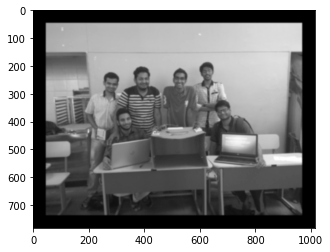

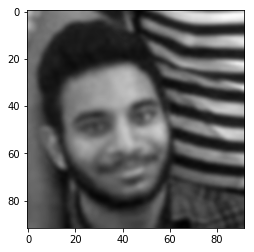

COORDINATE OF MAX VALUE(WHITEST SPOT): ( 277 , 470 )


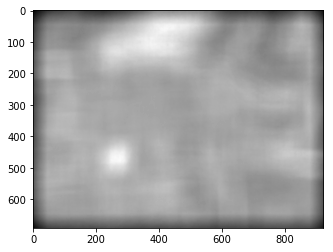

<Figure size 432x288 with 0 Axes>

In [3]:
corelate("image_s.jpg", "temp_s.jpg", 1, "1a.jpg")

**It can be observed that there is bright spot in the above image where there is my face.**

# **1) b)**

(1063, 1250)
(21, 22)
COORDINATE OF MAX VALUE(WHITEST SPOT): ( 318 , 810 )


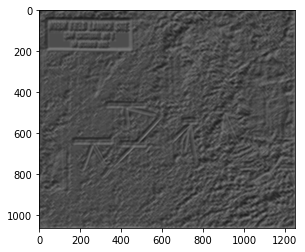

<Figure size 432x288 with 0 Axes>

In [12]:
corelate("u2cuba.jpg", "trailer.png", name="1b.jpg")

# **1) c)**

(1063, 1250)
(27, 28)
COORDINATE OF MAX VALUE(WHITEST SPOT): ( 54 , 117 )


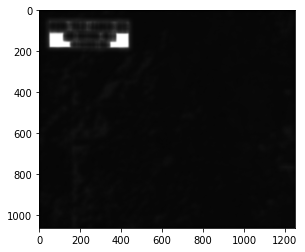

<Figure size 432x288 with 0 Axes>

In [5]:
corelate("u2cuba.jpg", "trailerSlightlyBigger.png", name="1c.jpg")

# **2)**

**Input image is padded with black pixels from all the sides using half the length and width of template. First parameter is the input image, second is template. The implementation is quite similar to cross correlation. The only major difference is the template is rotated 180 degree counter clockwise. This rotation is equivalent to flipping bottom to top and then right to left.**

Function to do convolution

In [6]:
def convolve(img, temp):   
    #loading image
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    #180 degree counter clockwise rotation of template
    template = np.rot90(temp, 2)
    print(image.shape)
    print(template.shape)
    pad_x = int(template.shape[0]/2)
    pad_y = int(template.shape[1]/2)
    #new convoluted image will be stored in this array
    new_img = np.zeros(shape=image.shape)
    #padding
    image = np.pad(image, ((pad_x, pad_x), (pad_y, pad_y)), 'constant')
    temp_x = template.shape[0]
    temp_y = template.shape[1]
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            patch = image[i:i+temp_x, j:j+temp_y]    #patch
            new_img[i][j] = np.sum(patch*template)   #convolution
            
    return new_img

#     plt.imshow(new_img, cmap = 'gray', interpolation = 'bicubic')
#     plt.show()

# **3) a, b) Sobel**
First Image is the input image. Second image is result with Sobel operator using my implementation of convolution. Third image is result of with Sobel operator using library function

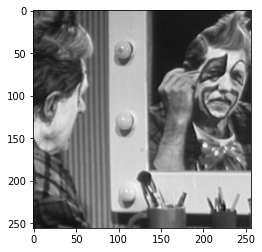

(256, 256)
(3, 3)
(256, 256)
(3, 3)


<Figure size 432x288 with 0 Axes>

In [7]:
#printing the original image
image = cv2.imread("clown.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

#sobel filter
sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

#printing image after convolution using implemented function
G = np.absolute(convolve("clown.tif", sobel_x)) + np.absolute(convolve("clown.tif", sobel_y))
plt.imshow(G, cmap = 'gray', interpolation = 'bicubic')
# plt.show()
plt.savefig("3a_Sobel")
plt.clf()

#printing image after convolution using library function
G = np.absolute(convolve2d(image, sobel_x, boundary="fill", fillvalue=0)) + np.absolute(convolve2d(image, sobel_y, boundary="fill", fillvalue=0))
plt.imshow(G, cmap = 'gray', interpolation = 'bicubic')
# plt.show()
plt.savefig("3b_Sobel")
plt.clf()

# **3) a, b) Laplacian**
First Image is the input image. Second image is result with Laplacian operator using my implementation of convolution. Third image is result of with Laplacian operator using library function

In [8]:
#laplacian filter
L = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]

#printing image after convolution using implemented function 
G = convolve("clown.tif", L)
plt.imshow(G, cmap = 'gray', interpolation = 'bicubic')
# plt.show()
plt.savefig("3a_Laplacian")
plt.clf()

#printing image after convolution using library function
G = convolve2d(image, L , boundary="fill", fillvalue=0)
plt.imshow(G, cmap = 'gray', interpolation = 'bicubic')
# plt.show()
plt.savefig("3b_Laplacian")
plt.clf()

(256, 256)
(3, 3)


<Figure size 432x288 with 0 Axes>

In [9]:
print("Finished in {}".format(time.time() - start))

Finished in 128.29944515228271
